In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import requests

pd.set_option('display.max_columns', None)

In [2]:
players_detailed_stats = pd.read_csv('output/detailed_player_data.csv')

In [3]:
players_detailed_stats.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,run_outs,maiden,stumps,match_outcome,opposition_team,strike_rate,economy,fantasy_points,venue
0,792295,RG Sharma,India,264,176,33,9,0,0,0,0,0,0,0,0,win,Sri Lanka,150.00,0.00,540,Eden Gardens
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,32,1,0,0,0,win,Zimbabwe,142.38,5.05,511,Manuka Oval
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,0,2,0,0,0,win,West Indies,142.77,0.00,505,Westpac Stadium
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,35,2,0,0,0,win,Bangladesh,190.72,5.00,480,Shere Bangla National Stadium
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,0,0,0,0,0,win,Bangladesh,157.89,0.00,456,"Zahur Ahmed Chowdhury Stadium, Chattogram"


In [4]:
players_detailed_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         52031 non-null  int64  
 1   player           52031 non-null  object 
 2   team             52031 non-null  object 
 3   runs             52031 non-null  int64  
 4   balls_faced      52031 non-null  int64  
 5   fours            52031 non-null  int64  
 6   sixes            52031 non-null  int64  
 7   wickets          52031 non-null  int64  
 8   overs_bowled     52031 non-null  int64  
 9   balls_bowled     52031 non-null  int64  
 10  runs_conceded    52031 non-null  int64  
 11  catches          52031 non-null  int64  
 12  run_outs         52031 non-null  int64  
 13  maiden           52031 non-null  int64  
 14  stumps           52031 non-null  int64  
 15  match_outcome    52031 non-null  object 
 16  opposition_team  52031 non-null  object 
 17  strike_rate 

In [5]:
players_detailed_stats.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,run_outs,maiden,stumps,match_outcome,opposition_team,strike_rate,economy,fantasy_points,venue
0,792295,RG Sharma,India,264,176,33,9,0,0,0,0,0,0,0,0,win,Sri Lanka,150.00,0.00,540,Eden Gardens
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,32,1,0,0,0,win,Zimbabwe,142.38,5.05,511,Manuka Oval
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,0,2,0,0,0,win,West Indies,142.77,0.00,505,Westpac Stadium
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,35,2,0,0,0,win,Bangladesh,190.72,5.00,480,Shere Bangla National Stadium
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,0,0,0,0,0,win,Bangladesh,157.89,0.00,456,"Zahur Ahmed Chowdhury Stadium, Chattogram"


In [6]:
players_detailed_stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
match_id,52031.0,737239.521939,450090.357565,64814.0,335356.0,656443.00,1168245.0,1457469.0
runs,52031.0,19.414484,26.860869,0.0,0.0,8.00,28.0,264.0
balls_faced,52031.0,24.443159,29.620684,0.0,2.0,13.00,36.0,176.0
fours,52031.0,1.786012,2.758606,0.0,0.0,1.00,3.0,33.0
sixes,52031.0,0.335473,0.917376,0.0,0.0,0.00,0.0,16.0
wickets,52031.0,0.599104,1.021852,0.0,0.0,0.00,1.0,7.0
overs_bowled,52031.0,3.960927,4.131063,0.0,0.0,3.00,8.0,12.0
balls_bowled,52031.0,24.443159,25.420471,0.0,0.0,18.00,51.0,75.0
runs_conceded,52031.0,19.414484,21.442355,0.0,0.0,13.00,37.0,113.0
catches,52031.0,0.380312,0.678978,0.0,0.0,0.00,1.0,6.0


# Statistical analysis

In [7]:
!pip3 install statsmodels -q

In [8]:
df = players_detailed_stats.copy()

numerical_features = df.describe().columns

target = df['fantasy_points']

In [9]:
anova_f_values, p_values = f_classif(df[numerical_features], target)

anova_results = pd.DataFrame({
    'Feature': numerical_features,
    'F-Value': anova_f_values,
    'P-Value': p_values
})

anova_results = anova_results.sort_values(by='F-Value', ascending=False)
print(anova_results)

           Feature     F-Value       P-Value
15  fantasy_points         inf  0.000000e+00
1             runs  227.290215  0.000000e+00
3            fours  161.444761  0.000000e+00
2      balls_faced  107.016716  0.000000e+00
4            sixes   98.209252  0.000000e+00
5          wickets   62.698460  0.000000e+00
6     overs_bowled   31.921744  0.000000e+00
7     balls_bowled   31.879324  0.000000e+00
13     strike_rate   30.345512  0.000000e+00
8    runs_conceded   22.213126  0.000000e+00
11          maiden   13.414751  0.000000e+00
14         economy   11.035876  0.000000e+00
9          catches    7.380178  0.000000e+00
12          stumps    3.320057  1.278122e-94
10        run_outs    2.117858  1.191921e-32
0         match_id    1.181498  8.339466e-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [10]:
# -----------------------------------------
# 2. Feature Engineering
# -----------------------------------------

# (a) Batting Form: Rolling average of recent scores (using a window of 5 matches)
# We assume that 'runs' is our indicator of batting performance.
# Group by player, compute rolling mean, and then align back to the original index.
df['batting_form'] = df.groupby('player')['runs'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# (b) Bowling Form: Rolling average of recent economy rate and total wickets in last 5 matches.
# Here we compute a rolling mean for economy and rolling sum for wickets.
df['bowling_form'] = df.groupby('player')['economy'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df['wickets_form'] = df.groupby('player')['wickets'].transform(lambda x: x.rolling(window=5, min_periods=1).sum())

# (c) Venue-Based Performance: Average fantasy points at a specific venue
df['venue_performance'] = df.groupby('venue')['fantasy_points'].transform('mean')

# (d) Opponent Performance: Average fantasy points against a particular opposition team
df['opponent_performance'] = df.groupby('opposition_team')['fantasy_points'].transform('mean')

In [11]:
df.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,run_outs,maiden,stumps,match_outcome,opposition_team,strike_rate,economy,fantasy_points,venue,batting_form,bowling_form,wickets_form,venue_performance,opponent_performance
0,792295,RG Sharma,India,264,176,33,9,0,0,0,0,0,0,0,0,win,Sri Lanka,150.00,0.00,540,Eden Gardens,264.0,0.00,0.0,65.636792,59.184009
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,32,1,0,0,0,win,Zimbabwe,142.38,5.05,511,Manuka Oval,215.0,5.05,2.0,77.490323,64.455287
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,0,2,0,0,0,win,West Indies,142.77,0.00,505,Westpac Stadium,237.0,0.00,0.0,58.729792,60.959980
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,35,2,0,0,0,win,Bangladesh,190.72,5.00,480,Shere Bangla National Stadium,185.0,5.00,1.0,58.532154,62.005888
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,0,0,0,0,0,win,Bangladesh,157.89,0.00,456,"Zahur Ahmed Chowdhury Stadium, Chattogram",210.0,0.00,0.0,69.522523,62.005888


In [12]:
categorical_features = ['team', 'opposition_team', 'venue', 'match_outcome', 'player']

encoders = {}
mappings = {}

In [13]:
for col in categorical_features:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [14]:
mappings['venue']['Eden Gardens']

75

In [15]:
df.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,run_outs,maiden,stumps,match_outcome,opposition_team,strike_rate,economy,fantasy_points,venue,batting_form,bowling_form,wickets_form,venue_performance,opponent_performance,team_encoded,opposition_team_encoded,venue_encoded,match_outcome_encoded,player_encoded
0,792295,RG Sharma,India,264,176,33,9,0,0,0,0,0,0,0,0,win,Sri Lanka,150.00,0.00,540,Eden Gardens,264.0,0.00,0.0,65.636792,59.184009,9,22,75,1,1379
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,32,1,0,0,0,win,Zimbabwe,142.38,5.05,511,Manuka Oval,215.0,5.05,2.0,77.490323,64.455287,25,26,149,1,327
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,0,2,0,0,0,win,West Indies,142.77,0.00,505,Westpac Stadium,237.0,0.00,0.0,58.729792,60.959980,16,25,294,1,1049
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,35,2,0,0,0,win,Bangladesh,190.72,5.00,480,Shere Bangla National Stadium,185.0,5.00,1.0,58.532154,62.005888,2,3,238,1,1576
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,0,0,0,0,0,win,Bangladesh,157.89,0.00,456,"Zahur Ahmed Chowdhury Stadium, Chattogram",210.0,0.00,0.0,69.522523,62.005888,9,3,300,1,691


In [16]:
num_cols_to_standardize = ['runs', 'balls_faced', 'fours', 'sixes', 'wickets', 'overs_bowled',
                           'balls_bowled', 'runs_conceded', 'catches', 'run_outs', 'maiden', 'stumps',
                           'strike_rate', 'economy', 'batting_form', 'bowling_form', 'wickets_form',
                           'venue_performance', 'opponent_performance']

scaler = StandardScaler()
df[num_cols_to_standardize] = scaler.fit_transform(df[num_cols_to_standardize])
min_max_scaler = MinMaxScaler()
df[['runs', 'strike_rate']] = min_max_scaler.fit_transform(df[['runs', 'strike_rate']])

In [17]:
df = df.drop(columns=['player', 'match_id', 'run_outs', 'stumps', 'opposition_team', 'match_outcome', 'venue', 'team'])

In [18]:
df.head()

,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,maiden,strike_rate,economy,fantasy_points,batting_form,bowling_form,wickets_form,venue_performance,opponent_performance,team_encoded,opposition_team_encoded,venue_encoded,match_outcome_encoded,player_encoded
0,1.000000,5.116637,11.315240,9.444996,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.250000,-0.952635,540,8.685721,-1.197797,-0.691583,1.068946,-0.455406,9,22,75,1,1379
1,0.814394,4.272624,2.977615,17.075530,1.370952,0.493600,0.533309,0.586952,0.912687,-0.394033,0.237300,0.791817,511,6.928012,0.998876,-0.222281,3.365155,2.113010,25,26,149,1,327
2,0.897727,4.779032,8.052691,11.625149,-0.586299,-0.958825,-0.961563,-0.905436,2.385504,-0.394033,0.237950,-0.952635,505,7.717188,-1.197797,-0.691583,-0.269045,0.409931,16,25,294,1,1049
3,0.700758,2.449556,4.790142,15.985454,0.392327,0.735671,0.690664,0.726864,2.385504,-0.394033,0.317867,0.774545,480,5.851864,0.977127,-0.456932,-0.307330,0.919547,2,3,238,1,1576
4,0.795455,3.664935,8.052691,10.535072,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.263150,-0.952635,456,6.748654,-1.197797,-0.691583,1.821671,0.919547,9,3,300,1,691


In [19]:
df[df['player_encoded'] == 1379]

,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,maiden,strike_rate,economy,fantasy_points,batting_form,bowling_form,wickets_form,venue_performance,opponent_performance,team_encoded,opposition_team_encoded,venue_encoded,match_outcome_encoded,player_encoded
0,1.000000,5.116637,11.315240,9.444996,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.250000,-0.952635,540,8.685721,-1.197797,-0.691583,1.068946,-0.455406,9,22,75,1,1379
6,0.791667,4.576469,3.702626,17.075530,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.217700,-0.952635,441,7.699252,-1.197797,-0.691583,1.393445,-1.177777,9,2,132,1,1379
9,0.787879,4.508948,4.065131,12.715225,-0.586299,-0.958825,-0.961563,-0.905436,0.912687,-0.394033,0.219417,-0.952635,428,7.358472,-1.197797,-0.691583,1.277254,-0.455406,9,22,190,1,1379
31,0.613636,4.002540,6.602669,3.994614,-0.586299,-0.958825,-0.961563,-0.905436,3.858320,-0.394033,0.188817,-0.952635,380,6.775558,-1.197797,-0.691583,-1.522373,0.409931,9,25,32,1,1379
77,0.647727,4.745272,4.065131,7.264843,-0.586299,-0.716754,-0.725531,-0.392427,-0.560129,-0.394033,0.172733,2.847161,353,6.490379,-0.240830,-0.691583,0.106411,-1.177777,9,2,292,0,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51618,0.000000,-0.791453,-0.647439,-0.365691,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.000000,-0.952635,-3,-0.762861,-1.197797,-0.691583,0.507435,0.029771,9,18,170,1,1379
51701,0.000000,-0.622651,-0.647439,-0.365691,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.000000,-0.952635,-3,-0.762861,-1.197797,-0.691583,0.347042,-1.451551,9,21,177,1,1379
51958,0.000000,-0.757693,-0.647439,-0.365691,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.000000,-0.952635,-3,-0.762861,-1.197797,-0.691583,-0.947931,-0.455406,9,22,207,1,1379
51989,0.000000,-0.723932,-0.647439,-0.365691,-0.586299,-0.958825,-0.961563,-0.905436,-0.560129,-0.394033,0.000000,-0.952635,-3,-0.784384,-1.197797,-0.691583,0.440448,0.029771,9,18,120,0,1379


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   runs                     52031 non-null  float64
 1   balls_faced              52031 non-null  float64
 2   fours                    52031 non-null  float64
 3   sixes                    52031 non-null  float64
 4   wickets                  52031 non-null  float64
 5   overs_bowled             52031 non-null  float64
 6   balls_bowled             52031 non-null  float64
 7   runs_conceded            52031 non-null  float64
 8   catches                  52031 non-null  float64
 9   maiden                   52031 non-null  float64
 10  strike_rate              52031 non-null  float64
 11  economy                  52031 non-null  float64
 12  fantasy_points           52031 non-null  int64  
 13  batting_form             52031 non-null  float64
 14  bowling_form          

In [21]:
columns_of_interest = df.columns

corr_matrix = df[columns_of_interest].corr()
corr_matrix['fantasy_points']

runs                       0.762731
balls_faced                0.639096
fours                      0.706821
sixes                      0.565918
wickets                    0.420516
overs_bowled               0.197598
balls_bowled               0.197914
runs_conceded              0.129805
catches                    0.075704
maiden                     0.177341
strike_rate                0.363835
economy                    0.044914
fantasy_points             1.000000
batting_form               0.774975
bowling_form               0.049064
wickets_form               0.355138
venue_performance          0.097715
opponent_performance       0.038848
team_encoded              -0.030620
opposition_team_encoded    0.006086
venue_encoded              0.005777
match_outcome_encoded      0.184619
player_encoded             0.011409
Name: fantasy_points, dtype: float64

# Modelling

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [23]:
features = [
    'runs',
    'balls_faced',
    'fours',
    'sixes',
    'wickets',
    'batting_form',
    'wickets_form',
    'strike_rate'
]
target_column = 'fantasy_points'

X = df[features]
y = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 7.961950251735885e-29
R-squared: 1.0
Mean Absolute Error (MAE): 3.957419635805225e-15


In [ ]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(X_train, y_train)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(rf_model, param_grid, n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  13.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=  27.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   9.1s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  30.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  13.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  13.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   8.8s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=  15.1s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  29.5s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [32]:
randomized_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error', verbose=2)>

In [35]:
randomized_search.cv

3

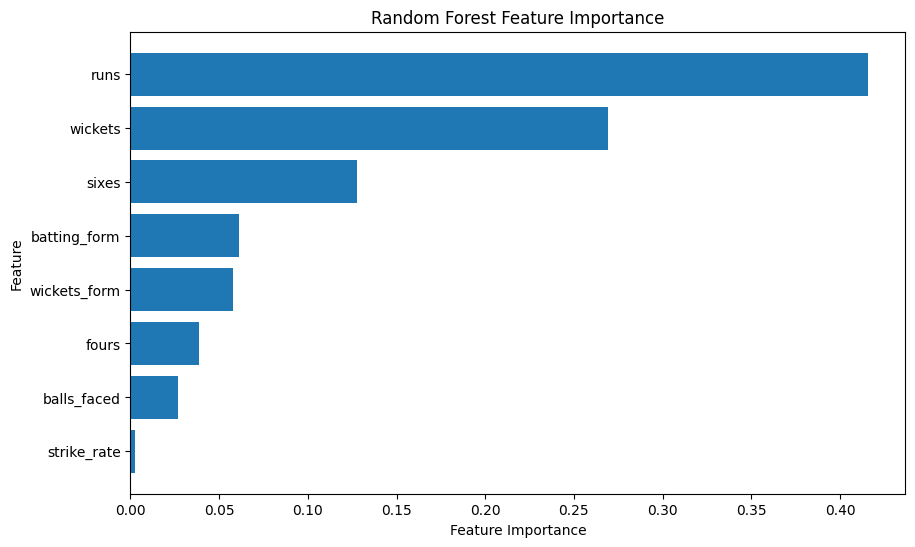

In [43]:
feature_importances = randomized_search.best_estimator_.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])

sorted_idx = np.argsort(feature_importances)
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

<Figure size 1000x600 with 0 Axes>

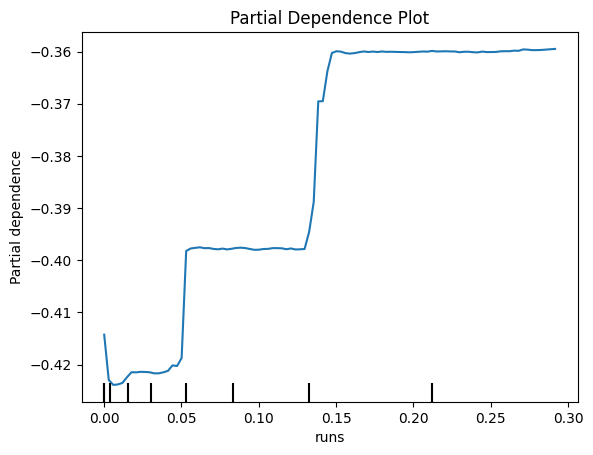

In [47]:
from sklearn.inspection import PartialDependenceDisplay

# Plot PDP for a specific feature (e.g., feature 0)
plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(best_model, X_train, features=[0])
plt.title('Partial Dependence Plot')
plt.show()

In [36]:
best_model = randomized_search.best_estimator_

In [37]:
y_pred = best_model.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Test Set Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)

Test Set Evaluation:
Mean Squared Error (MSE): 0.00577146688922478
R-squared (R²): 0.9840423485929096
Mean Absolute Error (MAE): 0.019816526013805222
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  15.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=  27.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=  18.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=  13.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  15.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   8.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=  18.0s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=  14.0s
[CV] END max_depth=None, min_sampl

In [42]:
best_model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')